In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
from sklearn.datasets import load_iris


In [13]:
dataset = load_iris()

In [15]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
import seaborn as sns

In [20]:
df = dataset.

In [25]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [35]:
X = df
y= pd.Series(data=dataset.target)

In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
classifer = DecisionTreeClassifier(criterion='entropy')

In [45]:
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
from sklearn import tree

[Text(297.6, 504.7714285714286, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(223.20000000000002, 427.11428571428576, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(372.0, 427.11428571428576, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(223.20000000000002, 349.4571428571429, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(148.8, 271.8, 'X[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(74.4, 194.14285714285717, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(223.20000000000002, 194.14285714285717, 'X[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(148.8, 116.48571428571432, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(74.4, 38.82857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(223.20000000000002, 38.82857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(297.6, 116.48571428571

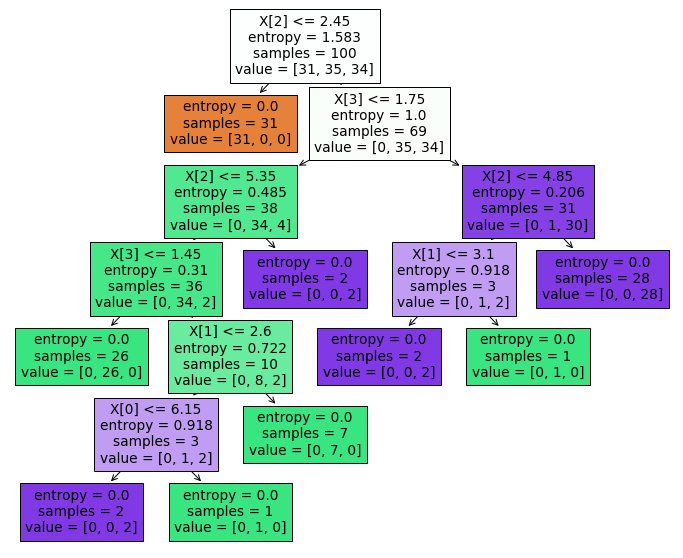

In [48]:
plt.figure(figsize=(12,10))
tree.plot_tree(classifer,filled=True)

In [49]:
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [50]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

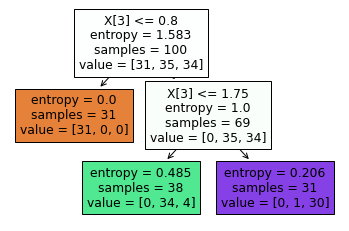

In [52]:
tree.plot_tree(classifier,filled=True)

In [54]:
y_pred=classifier.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Pre Pruning

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
gsv=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [60]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [61]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [62]:
gsv.best_score_

0.95

In [64]:
y_pred=gsv.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.88      0.94        17
           2       0.88      1.00      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

